![](http://sigdelta.com/assets/images/sages-sd-logo.png)

# Analiza danych i uczenie maszynowe w Python

Autor notebooka: Jakub Nowacki.

## Szeregi czasowe

Ważnym typem danych wykorzystywanych do analiz są szeregi czasowe. Jako, że Pandas powstawało początkowo z myślą o danych finansowych ma bardzo dobre wsparcie dla szeregów czasowych. Jest one obszernie opisane w [dokumentacji Pandas](https://pandas.pydata.org/pandas-docs/stable/timeseries.html).

Zacznijmy od prostszych danych z Movie Lens, które mają elementy szeregu czasowego.

In [1]:
import os
import pandas as pd
import matplotlib as mpl
%matplotlib inline

mpl.style.use('default')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 10

data_base = 'data'
data_dir = os.path.join(data_base, 'ml-latest-small')

In [2]:
movies = pd.read_csv(os.path.join(data_dir, 'movies.csv'))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
ratings = pd.read_csv(os.path.join(data_dir, 'ratings.csv'))
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
tags = pd.read_csv(os.path.join(data_dir, 'tags.csv'))
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


Zobaczmy co prezentuje się jak wyświetlimy dane po kolumnie `timestamp`. 

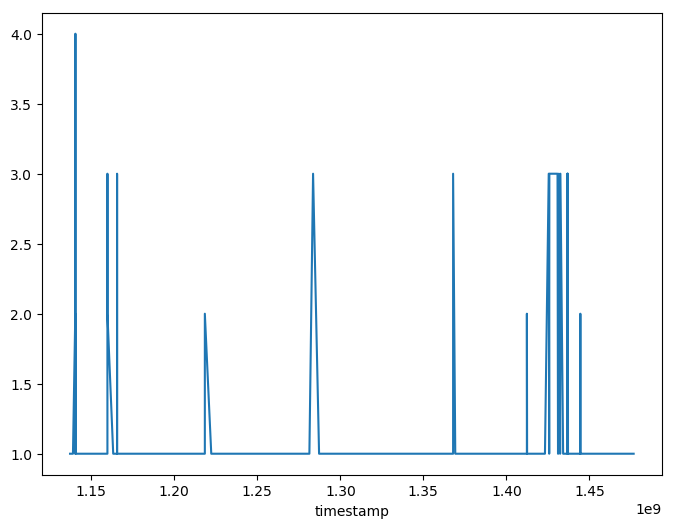

In [4]:
tags.groupby('timestamp').size().plot()

Są to znaczniki czasu [typu Unix](https://en.wikipedia.org/wiki/Unix_time); możemy zatem spróbować konwersji.

In [5]:
pd.to_datetime(tags.timestamp).head()

0   1970-01-01 00:00:01.138537770
1   1970-01-01 00:00:01.193435061
2   1970-01-01 00:00:01.170560997
3   1970-01-01 00:00:01.170626366
4   1970-01-01 00:00:01.141391765
Name: timestamp, dtype: datetime64[ns]

Okazuje się, że w tym przypadku jednostka to sekunda, a nie domyślna milisekunda.

In [ ]:
pd.to_datetime(tags.timestamp, unit='s').head()

Zatem możemy dodać odpowiednią kolumnę.

In [6]:
tags['time'] = pd.to_datetime(tags.timestamp, unit='s')

tags.head()

,userId,movieId,tag,timestamp,time
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30
1,15,1955,dentist,1193435061,2007-10-26 21:44:21
2,15,7478,Cambodia,1170560997,2007-02-04 03:49:57
3,15,32892,Russian,1170626366,2007-02-04 21:59:26
4,15,34162,forgettable,1141391765,2006-03-03 13:16:05


In [7]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 5 columns):
userId       1296 non-null int64
movieId      1296 non-null int64
tag          1296 non-null object
timestamp    1296 non-null int64
time         1296 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 50.7+ KB


Teraz wykres prezentuje się znacznie czytelniej. 

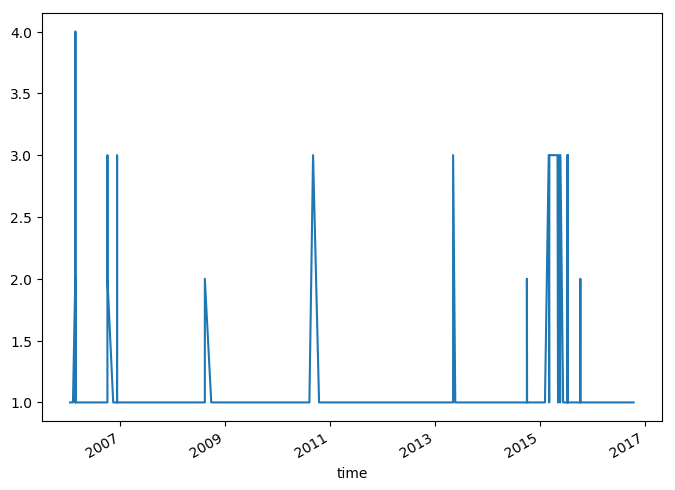

In [8]:
tags.groupby('time').size().plot()

Seria danych ma właściwość `dt`, która wprowadza szereg operacji, które możemy wykonywać na szeregu czasowym. Przykładowo, możemy wykonać przecięcie po datach. 

In [9]:
from datetime import date, datetime

tags[tags.time.dt.date > date(2007, 2, 1)].head()

,userId,movieId,tag,timestamp,time
1,15,1955,dentist,1193435061,2007-10-26 21:44:21
2,15,7478,Cambodia,1170560997,2007-02-04 03:49:57
3,15,32892,Russian,1170626366,2007-02-04 21:59:26
8,15,100365,activist,1425876220,2015-03-09 04:43:40
9,15,100365,documentary,1425876220,2015-03-09 04:43:40


In [10]:
tags[tags.time.dt.year == 2007].head()

,userId,movieId,tag,timestamp,time
1,15,1955,dentist,1193435061,2007-10-26 21:44:21
2,15,7478,Cambodia,1170560997,2007-02-04 03:49:57
3,15,32892,Russian,1170626366,2007-02-04 21:59:26
7,15,45950,powerpoint,1169616291,2007-01-24 05:24:51
95,164,608,Quirky,1179031045,2007-05-13 04:37:25


## Zadanie

1. Dodaj kolumnę `time` z poprawnym typem `datetime` do DataFrame'u `rating`.
1. Policz średnie oceny dla poszczególnych lat. 
1. Wyświetl 10 najlepiej ocenionych filmów w 2007 roku.

In [15]:

ratings['time']= pd.to_datetime(ratings.timestamp, unit='s')
ratings['time']

0        2009-12-14 02:52:24
1        2009-12-14 02:52:59
2        2009-12-14 02:53:02
3        2009-12-14 02:53:05
4        2009-12-14 02:53:25
5        2009-12-14 02:52:31
6        2009-12-14 02:53:07
7        2009-12-14 02:52:28
8        2009-12-14 02:52:05
9        2009-12-14 02:52:11
10       2009-12-14 02:52:15
11       2009-12-14 02:53:23
12       2009-12-14 02:53:11
13       2009-12-14 02:52:19
14       2009-12-14 02:53:14
15       2009-12-14 02:53:18
16       2009-12-14 02:51:48
17       2009-12-14 02:51:53
18       2009-12-14 02:53:20
19       2009-12-14 02:51:57
20       1996-06-21 11:11:33
21       1996-06-21 11:14:41
22       1996-06-21 11:13:24
23       1996-06-21 11:12:32
24       1996-06-21 11:13:06
25       1996-06-21 11:20:31
26       1996-06-21 11:15:49
27       1996-06-21 11:12:12
28       1996-06-21 11:20:16
29       1996-06-21 11:09:55
                 ...        
99974    2003-09-22 15:44:53
99975    2003-09-22 15:45:48
99976    2003-10-02 16:26:25
99977    2003-

Text(0,0.5,'rating')

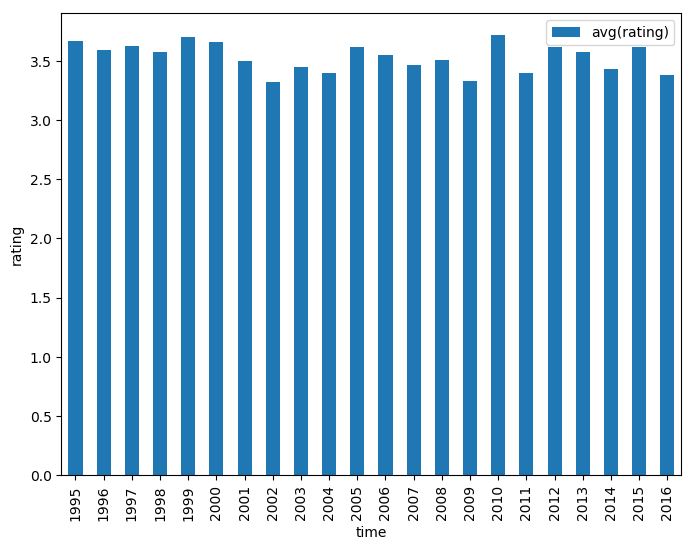

In [21]:
a=ratings.groupby(ratings.time.dt.year).rating.mean().to_frame(name='avg(rating)').plot.bar()
a.set_ylabel('rating')

In [26]:
ratings[ratings.time.dt.year==2007].dropna()\
    .groupby('movieId')[['rating']].mean()\
    .sort_values('rating',ascending='False').head(10)


,rating
movieId,
3933,0.5
4483,0.5
72,0.5
3418,0.5
3963,0.5
637,0.5
2968,0.5
33836,0.5
4775,0.5


## Próbkowanie

Często zdarza się, że chcemy zmienić zakres danych i policzyć dla nich agregaty. Przykładowo, chcemy policzyć łatwo sumę tagów dla danego roku. Najpierw sumujemy tagi jak poniżej.

In [27]:
tags_count = tags.groupby(tags.time.dt.date).size().rename('count').to_frame()
tags_count.head()

,count
time,
2006-01-14,1
2006-01-29,1
2006-02-03,2
2006-02-19,4
2006-02-20,68


Niestety ta operacja spowodowała, że daty to obiekty, a nie daty.

In [28]:
tags_count.index.dtype_str

'object'

Zmieńmy indeks na czasowy.

In [29]:
tags_count.index = pd.DatetimeIndex(tags_count.index)
tags_count.index.dtype_str

'datetime64[ns]'

Możemy teraz użyć grupowania po roku.

In [31]:
tags_count.groupby(tags_count.index.year).sum().head()

,count
time,
2006,168
2007,83
2008,22
2009,215
2010,61


Ale straciliśmy teraz informację o pełnej dacie. Możemy zatem zmienić próbkowanie danych.

In [32]:
tags_count.resample('Y').sum().head()#zliczamy(sumujemy) wszystko na koniec roku

,count
time,
2006-12-31,168
2007-12-31,83
2008-12-31,22
2009-12-31,215
2010-12-31,61


In [33]:
tags_count.resample('Y').sum().index.dtype_str

'datetime64[ns]'

In [ ]:
tags_count.head()

## Zadanie

1. Policz liczbę tagów dla poszczególnych miesięcy roku.
1. Policz liczbę tagów dla poszczególnych kwartałów.
1. Policz skumulowaną liczbę tagów dla poszczególnych lat.

In [39]:
tags_count.resample('M').sum().head()
tags_count.resample('MS').sum().head()#pocztki miesiecy
tags_count.resample('Q').sum().head()
tags_count.resample('A').sum().cumsum().head() # suma narastajaca po latach;rok tom Y albo A


,count
time,
2006-01-01,80
2006-04-01,21
2006-07-01,5
2006-10-01,62
2007-01-01,23


## Brakujące dane

Czasami zdarzają się braki w danych, zobaczmy przykładowo ilość tagów danego dnia dla filmów. Jeżeli policzymy ilość tagów dla danego dnia, okaże się, że sporo danych brakuje.

In [49]:
tags_per_day = tags_count.resample('D').sum()
tags_per_day.head()

,count
time,
2006-01-14,1
2006-01-15,0
2006-01-16,0
2006-01-17,0
2006-01-18,0


In [40]:
tags_per_day.describe()

,count
count,3929.000000
mean,0.329855
std,4.269156
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,197.000000


In [41]:
tags_per_day.size

3929

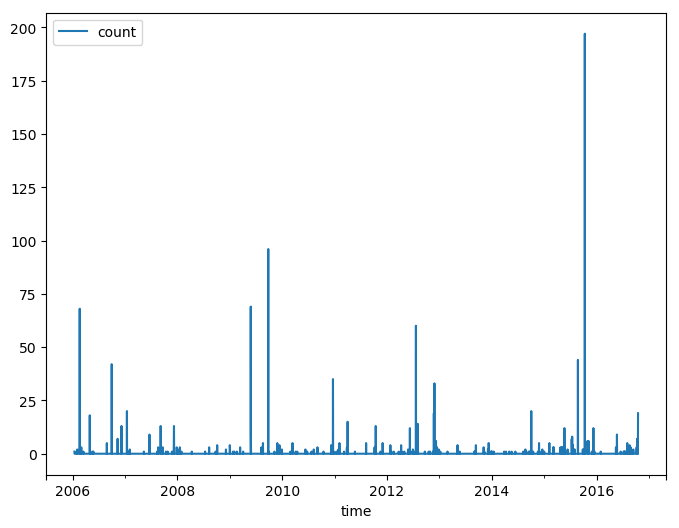

In [42]:
tags_per_day.plot();

Możemy pozbyć się pustych danych.

In [43]:
tags_per_day.dropna().head()

,count
time,
2006-01-14,1
2006-01-15,0
2006-01-16,0
2006-01-17,0
2006-01-18,0


Ale czasami lepiej wypełnić brakujące dane; zobacz szczegóły w [dokumentacji](http://pandas.pydata.org/pandas-docs/stable/missing_data.html).

In [44]:
tags_per_day.fillna(0).head()

,count
time,
2006-01-14,1
2006-01-15,0
2006-01-16,0
2006-01-17,0
2006-01-18,0


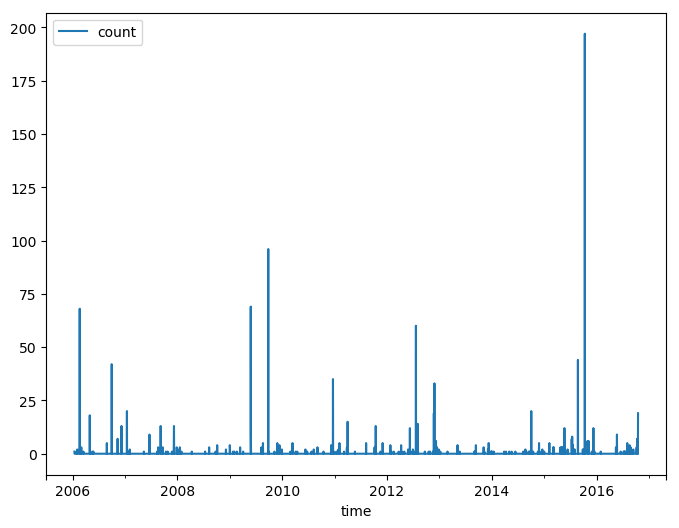

In [51]:
tags_per_day.fillna(-10).plot()

In [ ]:
tags_per_day.fillna(0).head()

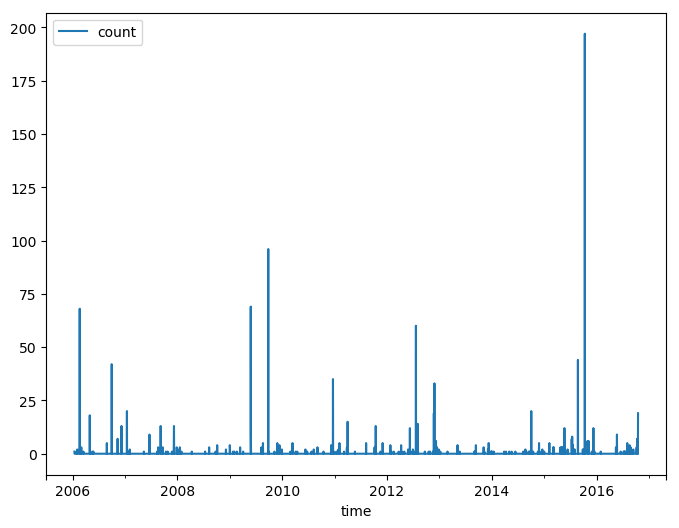

In [50]:
tags_per_day.ffill().plot()

In [46]:
tags_per_day.ffill(limit=5).head(10)

,count
time,
2006-01-14,1
2006-01-15,0
2006-01-16,0
2006-01-17,0
2006-01-18,0
2006-01-19,0
2006-01-20,0
2006-01-21,0
2006-01-22,0


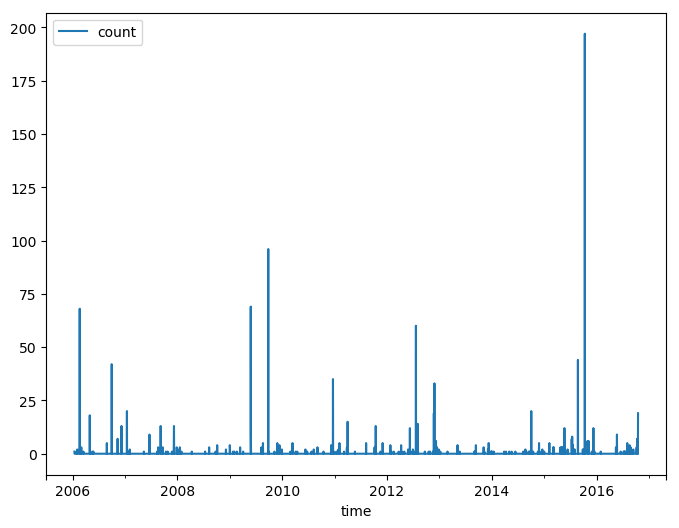

In [47]:
tags_per_day.ffill(limit=5).plot();

## Zadanie

1. Ile dni ma dane a ile nie?
1. Wypełnij dane wartością średnią.
1. Wykonaj interpolacje brakujących danych ([podpowiedź](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#interpolation))

## Funkcje okienne

Ważnym elementem w analizie danych czasowych jest praca z oknami danych. Pobierzmy zatem dane finansowe bardziej odpowiednie do takich analiz. Do tego celu wykorzystamy bibliotekę [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/).

In [58]:
import pandas_datareader as web

ModuleNotFoundError: No module named 'pandas_datareader'

In [57]:
stocks = web.get_data_yahoo(['AAPL', 'MSFT', 'SPY'])
stocks

NameError: name 'pandas_datareader' is not defined

W efekcie pobierania danych otrzymaliśmy trzecią strukturę danych w Pandas czyli [Panel](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#panel).

In [ ]:
stocks.items

Przeanalizujmy dane dla zamknięcia.

In [ ]:
close = stocks['Close']
close.head()

In [ ]:
close.AAPL.plot();

Aby wykonać okno przesuwne o szerokości 3 dni liczące średnią, możemy wykonać.

In [ ]:
close.rolling(window=3).mean().head(10)

In [ ]:
df = close.join(close.rolling(window=3).mean(), rsuffix='_window')
df.head()

In [ ]:
df[['AAPL', 'AAPL_window']].plot()

Aby lepiej widzieć efekty ograniczmy dane do miesiąca.

In [ ]:
close_m = close.resample('M').mean()
close_m

Okna mają wiele operacji agregujących.

In [ ]:
r = close_m.rolling(window=3) #sumy okienne

In [ ]:
r.sum()

In [ ]:
r.mean()

In [ ]:
import numpy as np

r.aggregate([np.sum, np.mean, np.max, np.min])

In [ ]:
r.agg({'AAPL': [np.min, np.max], 
       'MSFT': np.sum, 
       'SPY': np.mean})

Możemy też zastosować rozszerzające się okno, w tym przypadku z minimalnym rozmiarem 1 dnia.

In [ ]:
e = close_m.expanding(1)
e

In [ ]:
e.mean()

Porównajmy działanie tych okien.

In [ ]:
df = pd.DataFrame({
    'APPL': close_m.AAPL,
    'APPL_r': r.AAPL.mean(),
    'APPL_e': e.AAPL.mean()
})
df.head()

In [ ]:
df.plot();

## Zadanie

1. Pobierz inny zestaw akcji; zobacz przykładową [listę symboli](http://www.eoddata.com/symbols.aspx)
1. Porównaj różne wielkości okien uśredniających, np. 3, 5 i 10 dni; najlepiej to zrobić na wykresie.
1. Wyświetl 5-dniową minimalną, maksymalną i średnią cenę akcji, ale tylko dla dni w 2017 roku.
1. ★ Policz różnicę cen otwarcia i zamknięcia dla wybranych akcji. 

## Wielopoziomowy indeks

Po uważnej lekturze dokumentacji, można zauważyć, że z powodów postępów w rozwoju indeksów w Pandas, panel jest [elementem odchodzącym](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#deprecate-panel). W istocie, możemy zamienić panel na `DataFrame` z wielopoziomowym indeksem. 

In [ ]:
stocks_df = stocks.to_frame()
stocks_df.head(21)

In [ ]:
stocks_df.index

In [ ]:
stocks_df.loc['2016-11-17']

In [ ]:
stocks_df.loc[('2016-11-17', 'AAPL')]

In [ ]:
stocks_df.loc[(slice(None), 'AAPL'), :].head()

In [ ]:
stocks_df.loc[(slice(None), ('AAPL', 'SPY')), :].head()

In [ ]:
stocks_df.loc[(slice(None), ('AAPL', 'SPY')), ['Open', 'Close']].head()

Można też grupować po poziomach indeksu. 

In [ ]:
stocks_df.groupby(level=1).mean()

Możemy też zamienić indeks na kolumnę poprzez reset.

In [ ]:
stocks_df.reset_index(level=1).head()

To ułatwia z kolei zrobienie przykładowo tabeli przestawnej.

In [ ]:
stocks_df.reset_index(level=1).pivot?

In [ ]:
stocks_df.reset_index(level=1).pivot

In [ ]:
stocks_pivot = stocks_df.reset_index(level=1).pivot(columns='minor')
stocks_pivot.head()

In [ ]:
diff = (stocks_pivot[['Open']] - stocks_pivot['Close'])\
    .rename(columns={'Open': 'Diff'})
diff.head()

In [ ]:
stocks_pivot.join(diff).head()

## Zadanie

1. Pokaż tylko kolumny otwarcia, zamknięcia i różnicę.
1. Pokaż tylko różnicę dla AAPL.
1. Policz różnicę kwartalną akcji. 
1. Policz maksimum, minimum i średnią z różnicy w okienne z 3 dni. 